## 5.1 최적화 기초

데이터 분석의 최종 단계는 가장 적합한 숫자를 찾아내는 최적화 단계가 된다. 이 절에서는 가장 기본적인 유형의 최적화 문제와 이를 풀기위한 수치적인 방법을 공부한다.

### 최적화 문제

최적화 문제는 함수 $f$의 값을 최대화 혹은 최소화하는 변수 $x$의 값 $x^{\ast}$를 찾는 것이다. 수식으로는 다음처럼 쓴다.

$$ 
\begin{align}
x^{\ast} = \arg \max_x f(x) 
\tag{5.1.1}
\end{align}
$$

또는

$$ 
\begin{align}
x^{\ast} = \arg \min_x f(x) 
\tag{5.1.2}
\end{align}
$$


이 값 $x^{\ast}$를 최적화 문제의 **해(solution)**라고 한다. 만약 최소화 문제를 풀 수 있다면 $f(x)$를 $-f(x)$로 바꾸어 위아래를 뒤집은 다음 최소화 문제를 풀면 $f(x)$의 최대화 문제를 푼 것과 같다. 따라서 보통은 최소화 문제만 고려한다.

이때 최소화하려는 함수 $f(x)$를 **목적함수(objective function)**, **비용함수(cost function)**, **손실함수(loss function)** **오차함수(error function)** 등으로 부른다. 기호로는 각각 $J, C, L, E$로 표기하는 경우가 많다.

#### 예제

다음은 1차원 목적함수의 예이다. 그래프에서 이 목적함수 $f_1(x)$의 최저점은 $x^{\ast}=2$임을 알 수 있다.

D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54632 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-

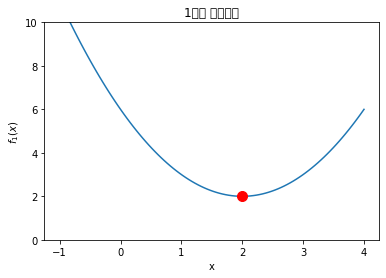

In [8]:
def f1(x):
    return (x - 2) ** 2 + 2

xx = np.linspace(-1, 4, 100)
plt.plot(xx, f1(xx))
plt.plot(2, 2, 'ro', markersize=10)
plt.ylim(0, 10)
plt.xlabel("x")
plt.ylabel("$f_1(x)$")
plt.title("1차원 목적함수")
plt.show()

#### 예제

다음 함수 $f_2(x, y)$는 2차원 목적함수의 예로 2차원 로젠브록(Rosenbrock) 함수라고 한다. 2차원 로젠브록  함수는 $x^{\ast}, y^{\ast} = (1, 1)$에서 최솟값을 가진다.

$$
\begin{align}
f(x, y) = (1 − x )^2 + 100(y − x^2)^2
\tag{5.1.3}
\end{align}
$$

Font 'default' does not have a glyph for '\ucc28' [U+cc28], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc6d0' [U+c6d0], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ub85c' [U+b85c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc820' [U+c820], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ube0c' [U+be0c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ub85d' [U+b85d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud568' [U+d568], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc218' [U+c218], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ucc28' [U+cc28], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc6d0' [U+c6d0], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ub85c' [U+b85c], 

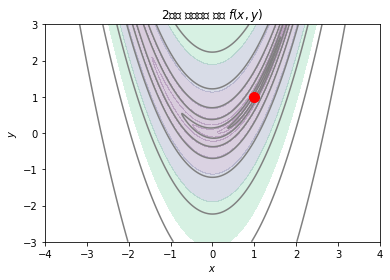

In [3]:
import numpy as np
import matplotlib.pylab as plt;
def f2(x, y):
    return (1 - x)**2 + 100.0 * (y - x**2)**2

xx = np.linspace(-4, 4, 800)
yy = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels=np.logspace(-1, 3, 10)
plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
plt.contour(X, Y, Z, colors="gray",
            levels=[0.4, 3, 15, 50, 150, 500, 1500, 5000])
plt.plot(1, 1, 'ro', markersize=10)

plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-3, 3, 7))
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("2차원 로젠브록 함수 $f(x,y)$")
plt.show()

### 그리드 서치와 수치적 최적화

목적함수의 값을 가장 작게 하는 $x$ 위치를 찾는 최적화 문제를 푸는 가장 간단한 방법은 가능한 $x$의 값을 여러개 넣어 보고 그중 가장 작은 값을 선택하는 **그리드 서치(grid search)** 방법이다. 함수 $f_1(x)$의 그래프를 그려 최저점을 찾은 방법도 그리드 서치 방법의 일종이다. 
그리드 서치는 가장 간단한 방법이지만 많은 $x$ 위치에 대해 목적함숫값을 계산해야 한다. 위에서 함수 $f_1(x)$의 최저점을 찾을 때는 사실 함수 계산을 100번 수행했다.

예측 모형을 만들 때 목적함숫값, 즉 예측 오차를 구하려면 모든 트레이닝 데이터 집합에 대해 예측값과 타깃값의 차이를 구해야 하므로 계산량이 상당히 크다. 따라서 그리드 서치보다 목적함수 계산을 적게 할 수 있는 방법이 필요하다. 

반복적 시행 착오(trial and error)에 의해 최적화 필요조건을 만족하는 값 $x^{\ast}$를 찾는 방법을 **수치적 최적화(numerical optimization)**라고 한다.  수치적 최적화 방법은 함수 위치가 최적점이 될 때까지 가능한 한 적은 횟수만큼 $x$ 위치를 옮기는 방법을 말한다.

수치적 최적화 방법은 다음 두 가지 알고리즘을 요구한다.

* 현재 위치 $x_k$가 최적점인지 판단하는 알고리즘
* 어떤 위치 $x_k$를 시도한 뒤, 다음 번에 시도할 위치 $x_{k+1}$을 찾는 알고리즘


### 기울기 필요조건

우선 현재 시도하고 있는 위치 $x$가 최소점인지 아닌지 알아내는 알고리즘을 생각해 보자. 

어떤 독립 변수 값 $x^{\ast}$가 최소점이려면 일단 다음과 같이 값 $x^{\ast}$에서 함수의 기울기(slope)와 도함수 $\dfrac{df}{dx}$ 값이 0이라는 조건을 만족해야 한다. 이를 **기울기 필요조건**이라고 한다. 

단일 변수에 대한 함수인 경우, **미분값이 0이어야 한다.**

$$ 
\begin{align}
\dfrac{df(x)}{dx} = 0
\tag{5.1.4}
\end{align}
$$


다변수 함수인 경우 **모든 변수에 대한 편미분값이 0이어야 한다.**

$$
\begin{align}
\dfrac{\partial f(x_1, x_2, \cdots , x_N)}{\partial x_1} = 0
\tag{5.1.5}
\end{align}
$$

$$
\begin{align}
\dfrac{\partial f(x_1, x_2, \cdots , x_N)}{\partial x_2} = 0
\tag{5.1.6}
\end{align}
$$

$$
\begin{align}
\vdots
\tag{5.1.7}
\end{align}
$$

$$
\begin{align}
\dfrac{\partial f(x_1, x_2, \cdots , x_N)}{\partial x_N} = 0
\tag{5.1.8}
\end{align}
$$

즉

$$ 
\begin{align}
\nabla f = 0 
\tag{5.1.9}
\end{align}
$$

이때 그레디언트(gradient) 벡터 $\nabla f$를 $g$라는 기호로 간단하게 나타내기도 한다.

$$
\begin{align}
g = 0
\tag{5.1.10}
\end{align}
$$

이 조건을 필요조건이라고 하는 이유는 기울기가 0이라고 반드시 최소점이 되지는 않지만, 모든 최소점은 기울기가 0이기 때문이다. 일반적인 수치적 최적화 알고리즘에서는 기울기 필요조건을 이용하여 최적점에 도달했는지 판단한다. 

기울기가 0이어도 최소점이 아니라 최고점일 수도 있다. 기울기가 0인 위치가 최소점임을 확인하려면 2차 도함수의 부호도 계산해야 한다. 기울기가 0이고 2차도함수가 양수면 최소점이다. 반대로 기울기가 0이고 2차 도함수가 음수면 최대점이 된다.

### 최대경사법

**최대경사법(Steepest Gradient Descent)방법**은 단순히 현재 위치 $x_k$에서의 기울기 값 $g(x_k)$ 만을 이용하여 다음번 위치 $x_{k+1}$를 결정하는 방법이다.

$$ 
\begin{align}
x_{k+1} = x_{k} - \mu \nabla f(x_k) = x_{k} - \mu g(x_k) 
\tag{5.1.11}
\end{align}
$$

만약 현재 위치 $x_k$에서 기울기가 음수면 즉 곡면이 아래로 향하면 $g(x_k) < 0$이므로 앞으로 진행하고 현재 위치 $x_k$에서 기울기가 양수면  $g(x_k) > 0$이므로 뒤로 진행하게 되어 점점 낮은 위치로 옮겨간다. 이때 위치를 옮기는 거리를 결정하는 비례상수 $\mu$를 **스텝 사이즈(step size)**라고 한다. 

$x_k$가 일단 최적 점에 도달했을 때는 $g(x_k) = 0$이 되므로 더 이상 위치를 옮기지 않는다. 

#### 예제

위에서 예로 든 1차원 목적함수를 이 방법으로 최적화하면 다음과 같다. 우선 사람이 직접 목적함수를 미분하여 도함수를 파이썬으로 구현해야 한다.

In [6]:
def f1d(x):
    """f1(x)의 도함수"""
    return 2 * (x - 2.0)

$x=0$에서 시작하여 최대경사법으로 최적점을 찾아나가는 과정은 다음과 같다.

1st trial: x_1 = 0.00, g_1 = -4.00
2nd trial: x_2 = 1.60, g_2 = -0.80
3rd trial: x_3 = 1.92, g_3 = -0.16


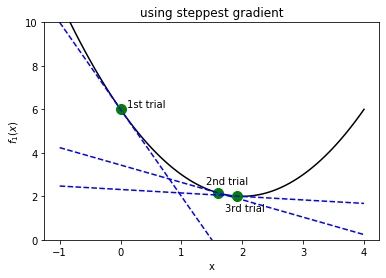

In [10]:
xx = np.linspace(-1, 4, 100)

plt.plot(xx, f1(xx), 'k-')

# step size
mu = 0.4

# k = 0
x = 0
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x + 0.1, f1(x) + 0.1, "1st trial")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("1st trial: x_1 = {:.2f}, g_1 = {:.2f}".format(x, f1d(x)))

# k = 1
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x - 0.2, f1(x) + 0.4, "2nd trial")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("2nd trial: x_2 = {:.2f}, g_2 = {:.2f}".format(x, f1d(x)))

# k = 2
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x - 0.2, f1(x) - 0.7, "3rd trial")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("3rd trial: x_3 = {:.2f}, g_3 = {:.2f}".format(x, f1d(x)))

plt.xlabel("x")
plt.ylabel("$f_1(x)$")
plt.title("using steppest gradient")
plt.ylim(0, 10)
plt.show()

최대경사법에서는 스텝 사이즈의 크기를 적절히 조정하는 것이 중요하다. 보통 스텝 사이즈를 사용자가 경험적으로 얻는 값으로 고정하거나 특정한 알고리즘에 따라 변화시킨다. 하지만 스텝 사이즈가 너무 작으면 최저점을 찾아가는데 시간이 너무 오래 걸리고 스텝 사이즈가 너무 크면 다음 그림과 같이 오히려 최저점에서 멀어지는 현상이 발생할 수 있다.

1차 시도: x_1 = 0.00, g_1 = -4.00
2차 시도: x_2 = 4.40, g_2 = 4.80
3차 시도: x_3 = -0.88, g_3 = -5.76


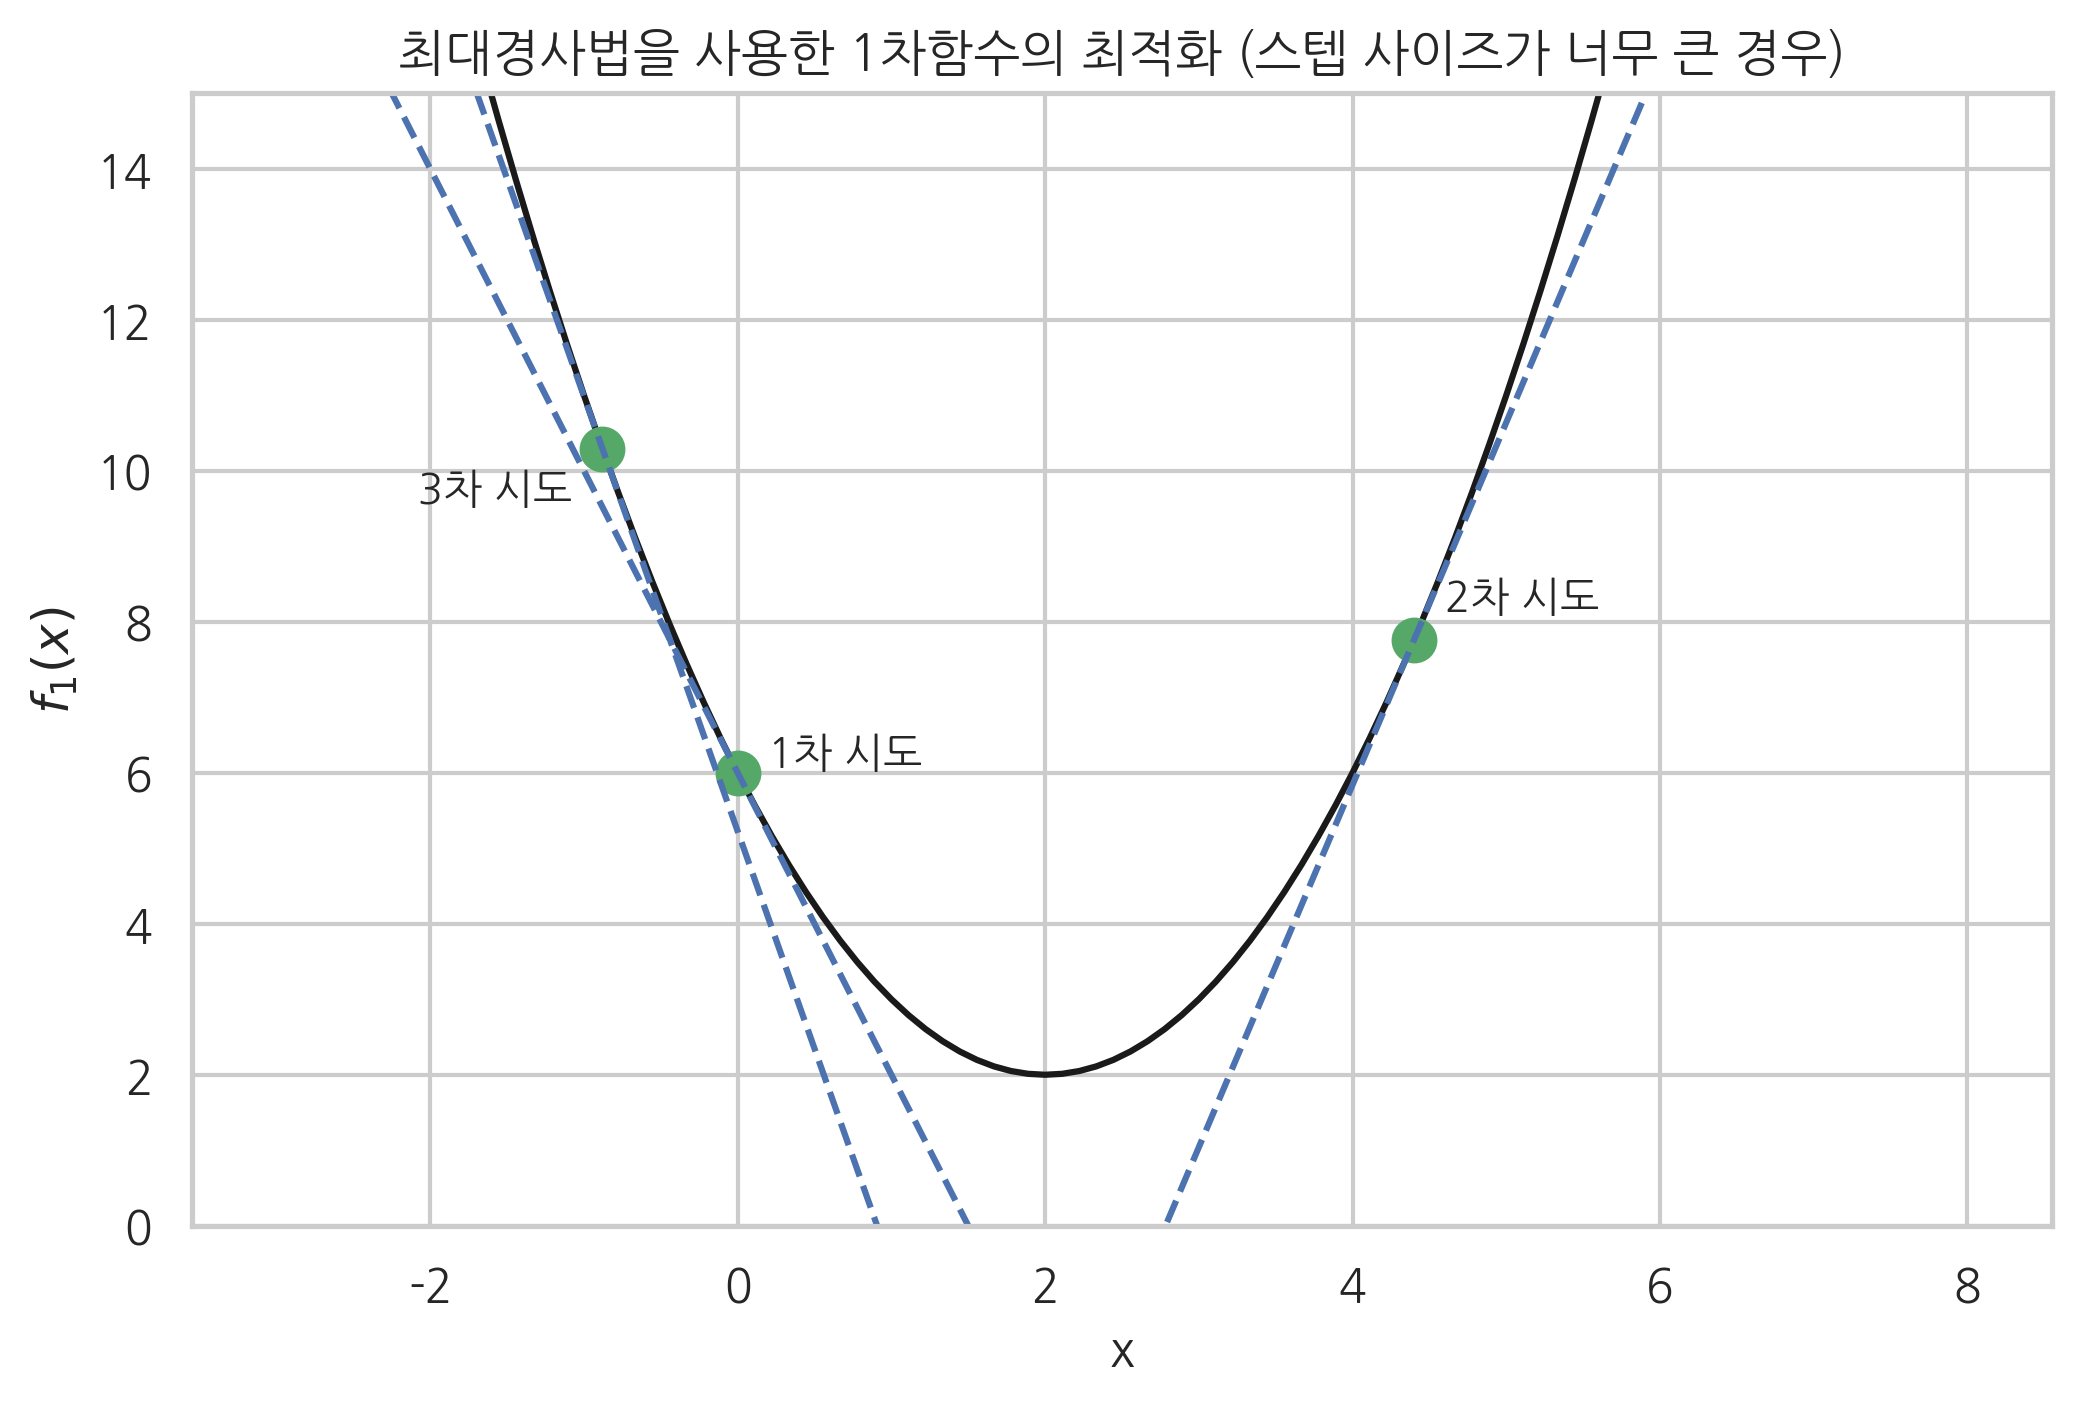

In [5]:
xx = np.linspace(-3, 8, 100)

plt.plot(xx, f1(xx), 'k-')

# step size (너무 큰 값!)
mu = 1.1

# k = 0
x = 0
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x + 0.2, f1(x) + 0.1, "1차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("1차 시도: x_1 = {:.2f}, g_1 = {:.2f}".format(x, f1d(x)))

# k = 1
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x + 0.2, f1(x) + 0.4, "2차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("2차 시도: x_2 = {:.2f}, g_2 = {:.2f}".format(x, f1d(x)))

# k = 2
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x - 1.2, f1(x) - 0.7, "3차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("3차 시도: x_3 = {:.2f}, g_3 = {:.2f}".format(x, f1d(x)))

plt.ylim(0, 15)
plt.xlabel("x")
plt.ylabel("$f_1(x)$")
plt.title("최대경사법을 사용한 1차함수의 최적화 (스텝 사이즈가 너무 큰 경우)")
plt.show()

#### 예제

2차원 Rosenbrock 함수에 대해 최대경사법을 적용해보자. 목적함수를 미분하여 도함수를 구한 다음 그레디언트 벡터를 파이썬 함수로 구현한다.

In [12]:
def f2g(x, y):
    """f2(x, y)의 도함수"""
    return np.array((2.0 * (x - 1) - 400.0 * x * (y - x**2), 200.0 * (y - x**2)))

다음 그림에 $x=-1, y-1$에서 시작하여 최대경사법으로 최적점을 찾아나가는 과정을 그레디언트 벡터 화살표와 함께 보였다.

D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51012 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-

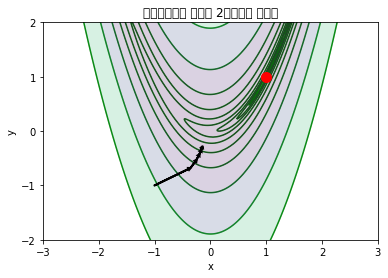

In [13]:
xx = np.linspace(-4, 4, 800)
yy = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels = np.logspace(-1, 3, 10)

plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
plt.contour(X, Y, Z, colors="green", levels=levels, zorder=0)
plt.plot(1, 1, 'ro', markersize=10)

mu = 8e-4  # step size
s = 0.95  # for arrowhead drawing

x, y = -1, -1
for i in range(5):
    g = f2g(x, y)
    plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1],
              head_width=0.04, head_length=0.04, fc='k', ec='k', lw=2)
    x = x - mu * g[0]
    y = y - mu * g[1]

plt.xlim(-3, 3)
plt.ylim(-2, 2)
plt.xticks(np.linspace(-3, 3, 7))
plt.yticks(np.linspace(-2, 2, 5))
plt.xlabel("x")
plt.ylabel("y")
plt.title("최대경사법을 사용한 2차함수의 최적화")
plt.show()

최적화 결과는 시작점의 위치나 스텝 사이즈 등에 따라 크게 달라진다. 다음 그림에서 볼 수 있듯이 최대경사법 방법은 곡면의 모양이 **계곡(valley)**과 같이 생긴 경우, 즉 그레디언트 벡터가 최저점을 가리키고 있지 않는 경우에는 **진동(oscillation) 현상**이 발생한다. 따라서 수렴하기까지 시간이 오래 걸릴 수 있다.

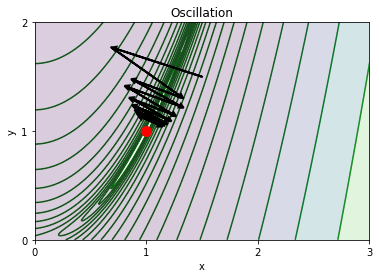

In [15]:
xx = np.linspace(0, 4, 800)
yy = np.linspace(0, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels = np.logspace(-1, 4, 20)

plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
plt.contour(X, Y, Z, colors="green", levels=levels, zorder=0)
plt.plot(1, 1, 'ro', markersize=10)

mu = 1.8e-3  # 스텝 사이즈
s = 0.95  # 화살표 크기

x, y = 1.5, 1.5
for i in range(15):
    g = f2g(x, y)
    plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1],
              head_width=0.04, head_length=0.04, fc='k', ec='k', lw=2)
    x = x - mu * g[0]
    y = y - mu * g[1]

plt.xlim(0, 3)
plt.ylim(0, 2)
plt.xticks(np.linspace(0, 3, 4))
plt.yticks(np.linspace(0, 2, 3))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Oscillation")
plt.show()

이러한 진동 현상을 없앨 수 있는 방법으로는 2차 도함수, 즉 헤시안 행렬을 이용하는 방법이나 모멘텀 방법(momentum)이 있다. 모멘텀 방법은 진행 방향으로 계속 진행하도록 성분(모멘텀)을 추가하는 것이다. 일반적인 경우에는 2차 도함수를 이용하는 방법을 사용하고 2차 도함수를 계산하기 어려운 인공신경망 등에서는 모멘텀 방법을 선호한다. 모멘텀 방법(momentum)에 대해서는 이 책에서 다루지 않는다.

### 2차 도함수를 사용한 뉴턴 방법

**뉴턴(Newton) 방법**은 목적함수가 2차 함수라는 가정하에 한 번에 최저점을 찾는다. 그레디언트 벡터에 헤시안 행렬의 역행렬을 곱해서 방향과 거리가 변형된 그레디언트 벡터를 사용한다


$$ 
\begin{align}
{x}_{n+1} = {x}_n - [{H}f({x}_n)]^{-1} \nabla f({x}_n) 
\tag{5.1.12}
\end{align}
$$

스텝 사이즈가 필요없고 목적함수가 실제로 2차함수와 비슷한 모양이면 빨리 수렴할 수 있다는 장점이 있지만 1차 도함수(그레디언트 벡터)뿐 아니라 2차 도함수(헤시안 행렬)도 필요로 한다.

예를 들어 다음 단변수 2차 함수

$$
\begin{align}
f(x) = a(x-x_0)^2 + c = ax^2 -2ax_0x + x_0^2+c
\tag{5.1.13}
\end{align}
$$

는 $x=x_0$에서 최솟값을 가진다.

단변수함수 뉴턴 방법은 다음과 같다. 즉 최적의 스텝 사이즈가 $\frac{1}{f''(x_n)}$이라는 것을 보여준다.

$$
\begin{align}
{x}_{n+1} = {x}_n - \dfrac{f'(x_n)}{f''(x_n)}
\tag{5.1.14}
\end{align}
$$

2차 함수에 대해 도함수와 2차 도함수가

$$
\begin{align}
f'(x) = 2ax - 2ax_0
\tag{5.1.15}
\end{align}
$$

$$
\begin{align}
f''(x) = 2a
\tag{5.1.16}
\end{align}
$$

이므로 뉴턴 방법에 적용하면

$$
\begin{align}
{x}_{n+1} = {x}_n - \dfrac{2ax_n - 2ax_0}{2a} = x_n - (x_n - x_0) = x_0
\tag{5.1.17}
\end{align}
$$

이므로 어떤 점 $x_n$에서 시작해도 바로 최저점으로 이동한다.

### 준 뉴턴 방법

뉴턴 방법은 목적함수가 2차 함수와 비슷한 모양을 가진 경우에 빠르게 수렴할 수 있다는 장점이 있지만 2차도함수인 헤시안 행렬 함수를 사람이 미리 구현해야 하고 함수의 모양에 따라서는 잘 수렴하지 않을 수도 있다. **준 뉴턴(Quasi-Newton) 방법**에서는 사람이 구한 헤시안 행렬 함수를 사용하는 대신 현재 시도하고 있는 $x_n$ 주변의 몇몇 점에서 함수의 값을 구하고 이를 이용하여 2차 도함수의 근사값 혹은 이에 상응하는 정보를 수치적으로 계산한다. 준 뉴턴 방법 중에서 BFGS(Broyden–Fletcher–Goldfarb–Shanno) 방법이 많이 사용된다.

CG(conjugated gradient) 방법은 준 뉴턴 방법처럼 헤시안 행렬을 필요로 하지 않고 변형된 그레디언트 벡터를 바로 계산한다.

### SciPy를 이용한 최적화

사이파이(SciPy)의 optimize 서브 패키지는  최적화 명령 `minimize()`를 제공한다. 세부적인 알고리즘은 `method` 인수로 선택할 수 있다. 디폴트 알고리즘은 앞에서 설명한 BFGS 방법이다. `minimize()` 명령은 최적화할 함수와 최적화를 시작할 초깃값을 인수로 받는다. 더 자세한 내용은 사이파이 문서를 참조한다. (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)

```
result = minimize(func, x0, jac=jac)
```

* `func`: 목적함수
* `x0`: 초깃값 벡터
* `jac`: (옵션) 그레디언트 벡터를 출력하는 함수

`minimize()` 명령의 결과는 `OptimizeResult` 클래스 객체로 다음 속성을 가진다.

* `x`: 최적화 해
* `success`: 최적화에 성공하면 `True` 반환
* `status`: 종료 상태. 최적화에 성공하면 0 반환
* `message`: 메시지 문자열
* `fun`: x 위치에서의 함수의 값
* `jac`: x 위치에서의 자코비안(그레디언트) 벡터의 값 
* `hess_inv`: x 위치에서의 헤시안 행렬의 역행렬의 값 
* `nfev`: 목적함수 호출 횟수
* `njev`: 자코비안 계산 횟수
* `nhev`: 헤시안 계산 횟수
* `nit`: x 이동 횟수

#### 예제

`minimize()` 명령으로 위에서 예로 들었던 1차원 함수를 최적화하면 다음과 같다.

In [19]:
from scipy import stats, optimize, interpolate
import scipy as sp
# 목적함수 재정의
def f1(x):
    return (x - 2) ** 2 + 2

x0 = 0  # 초깃값
result = sp.optimize.minimize(f1, x0)
print(result)

      fun: 2.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([1.99999999])


이 결과를 보면 최적해를 찾기 전에 x값의 위치는 2번밖에 바뀌지 않았지만 함수 호출 횟수는 9번이다. 그 이유는 그레디언트 계산에 필요한 1차 미분(그레디언트 벡터) 함수나 헤시안 함수가 주어지지 않았기 때문에 x값의 위치 근처에서 여러 번 함수를 계산하여 그레디언트 벡터의 근사값을 찾는 방법을 쓰기 때문이다. 이를 막고 계산량을 줄이려면 사람이 직접 그레디언트 벡터값을 반환하는 함수를 만들어 `jac` 인수로 넣어주면 된다.

In [20]:
def f1p(x):
    """f1(x)의 도함수"""
    return 2 * (x - 2)

result = sp.optimize.minimize(f1, x0, jac=f1p)
print(result)

      fun: 2.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.])


#### 예제

다변수 함수를 최적화하는 경우에는 목적함수가 벡터 인수를 가져야 한다.

In [21]:
# 2차원 목적함수 재정의(벡터 입력을 받도록)
def f2(x):
    return (1 - x[0])**2 + 100.0 * (x[1] - x[0]**2)**2

x0 = (-2, -2)
result = sp.optimize.minimize(f2, x0)
print(result)

      fun: 5.2112890141803265e-12
 hess_inv: array([[0.49938636, 0.99860874],
       [0.99860874, 2.00187364]])
      jac: array([ 7.32138760e-05, -3.35902622e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 536
      nit: 55
     njev: 131
   status: 2
  success: False
        x: array([0.99999854, 0.9999969 ])



이 예와 같이 최적화에 성공하지 못하는 경우도 있기 때문에 성공 여부를 확인하고 최적화 결과를 이용해야 한다.

#### 연습 문제 5.1.1

2차원 로젠브록 함수에 대해 

(1) 최적해에 수렴할 수 있도록 초기점을 변경하여 본다.

(2) 그레디언트 벡터 함수를 구현하여 `jac` 인수로 주는 방법으로 계산 속도를 향상시킨다.

In [31]:
def rosen(x):
    return (1 - x[0])**2 + 100.0 * (x[1] - x[0]**2)**2
# 최적점 1,1
xy = (0, 0)
result = sp.optimize.minimize(rosen, xy)
print(result)
print('')
def rosen2g(x):
    """f2(x, y)의 도함수"""
    return np.array((2.0 * (x[0] - 1) - 400.0 * x[0] * (x[1] - x[0]**2), 200.0 * (x[1] - x[0]**2)))

result2 = sp.optimize.minimize(rosen, xy, jac=rosen2g)
print(result2)

      fun: 2.8440316101421118e-11
 hess_inv: array([[0.49482454, 0.98957634],
       [0.98957634, 1.98394215]])
      jac: array([ 3.98673709e-06, -2.84416559e-06])
  message: 'Optimization terminated successfully.'
     nfev: 96
      nit: 19
     njev: 24
   status: 0
  success: True
        x: array([0.99999467, 0.99998932])

      fun: 7.717288359756836e-13
 hess_inv: array([[0.49480256, 0.98953879],
       [0.98953879, 1.98387918]])
      jac: array([ 3.92841205e-06, -2.83120876e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 19
     njev: 24
   status: 0
  success: True
        x: array([0.99999913, 0.99999825])


### 전역 최적화 문제

만약 최적화하려는 함수가 **복수의 국소 최저점(local minima)을 가지고 있는 경우에는 수치적 최적화 방법으로 전역 최저점(global minimum)에 도달한다는 보장이 없다**. 결과는 초기 추정값 및 알고리즘, 파라미터 등에 의존한다. 

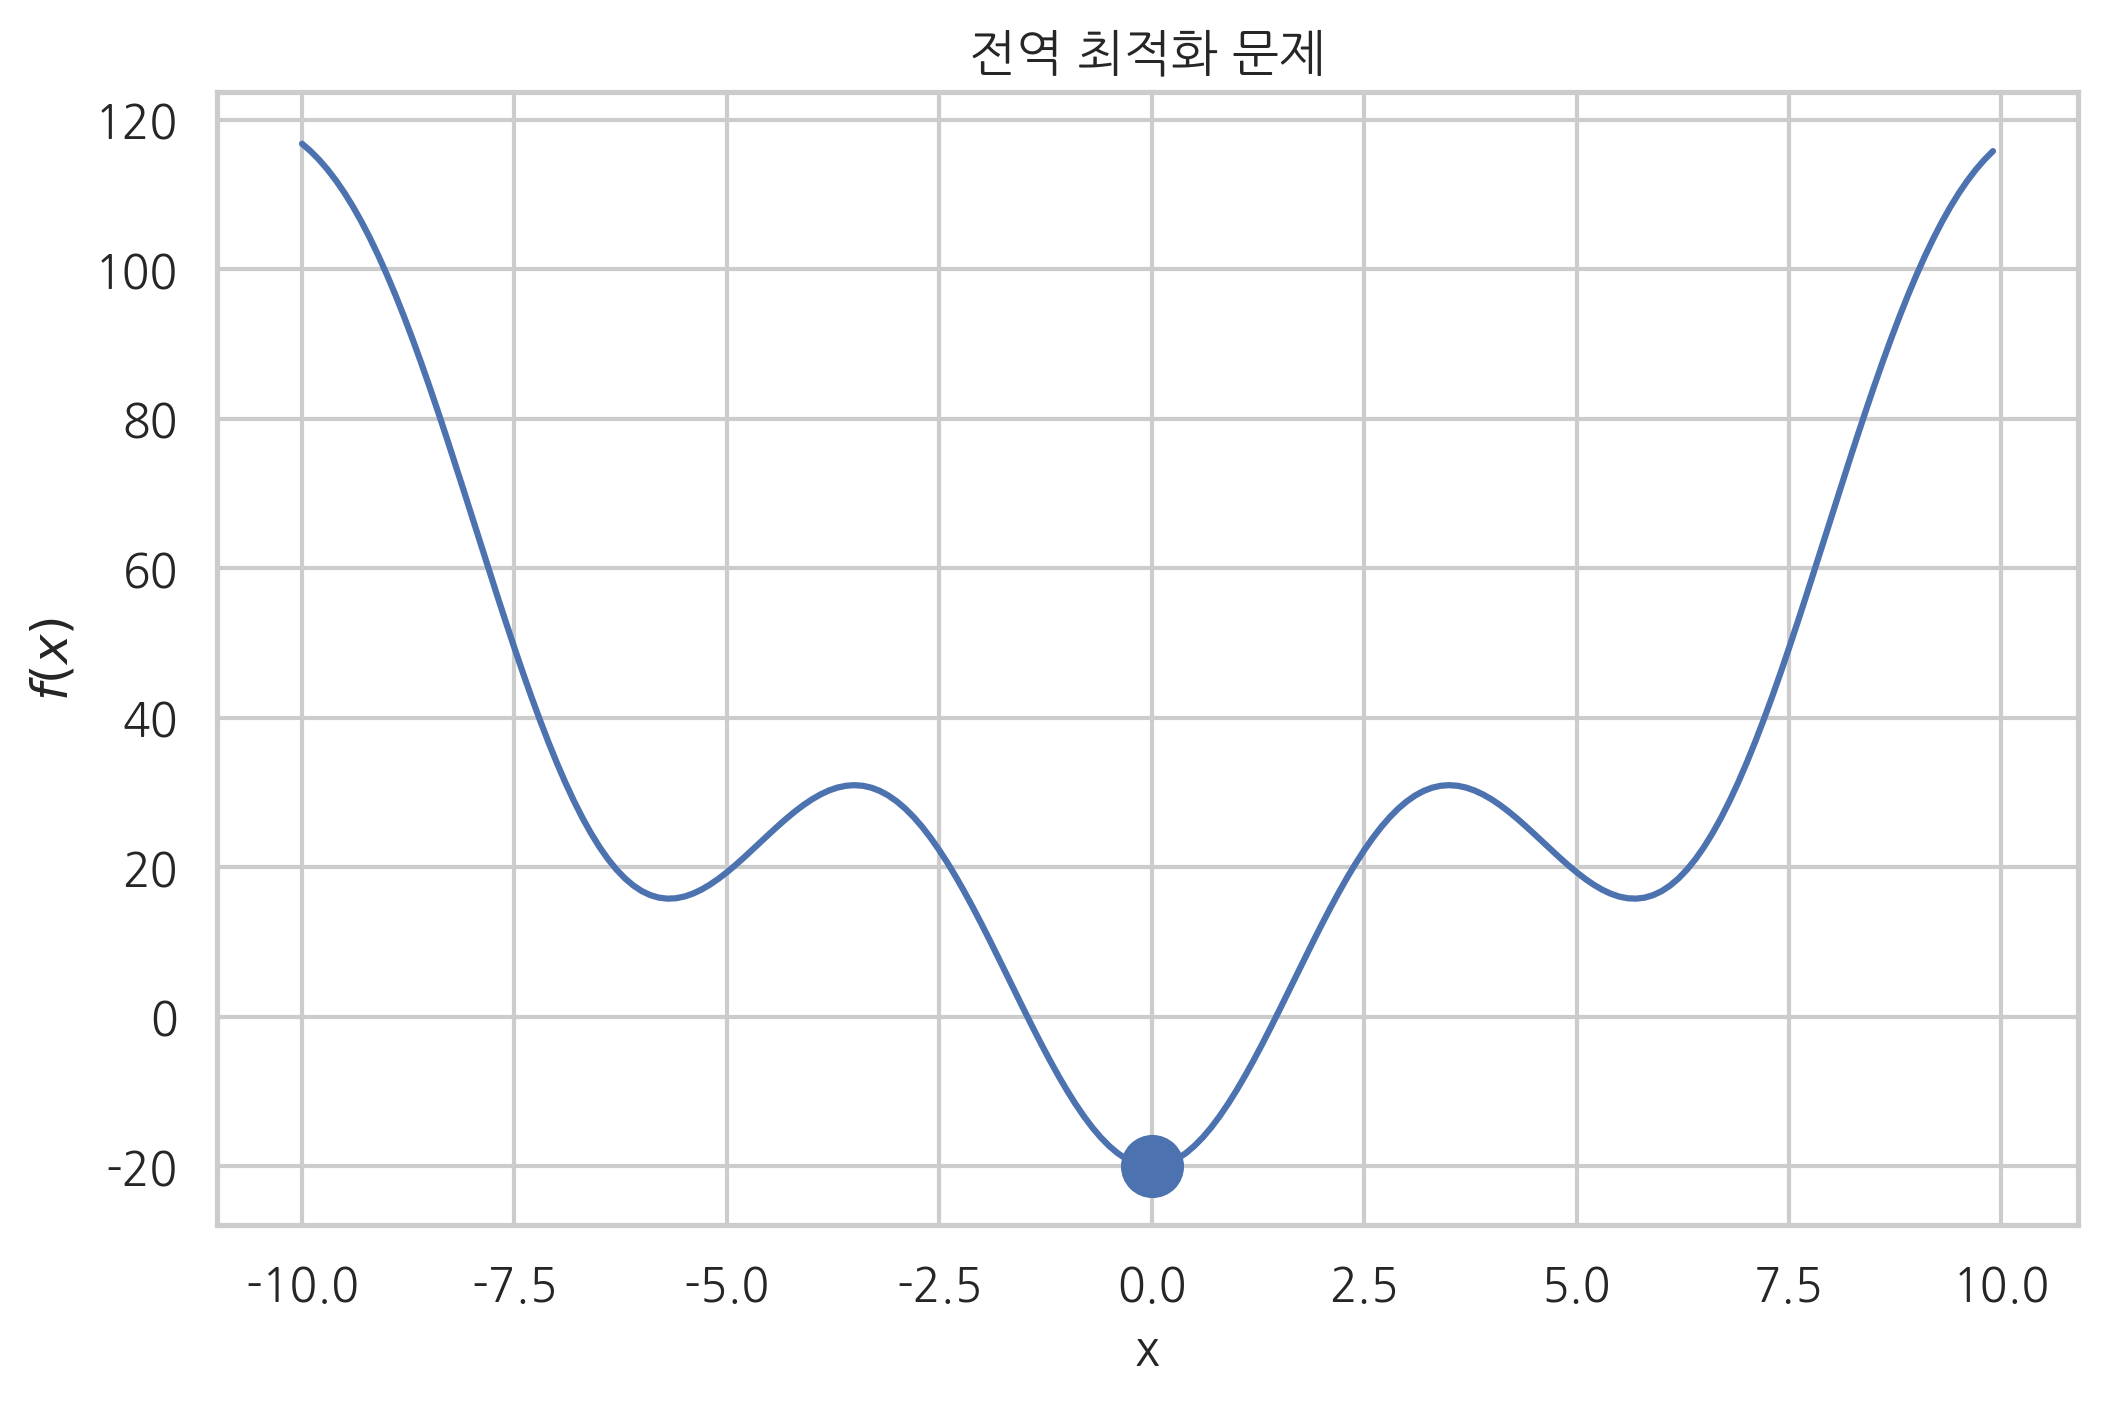

In [12]:
def f_global(x):
    """비선형 목적함수"""
    return x**2 - 20 * np.cos(x)

x = np.arange(-10, 10, 0.1)
plt.plot(x, f_global(x))
plt.scatter(0, f_global(0), s=200)
plt.xlabel("x")
plt.ylabel("$f(x)$")
plt.title("전역 최적화 문제")
plt.show()

다음은 초깃값이 좋지 않아서 전역 최저점으로 수렴하지 못하는 경우이다.

In [13]:
result = sp.optimize.minimize(f_global, 4)
print(result)
x_sol = result['x']
x_sol

      fun: 15.791736781359312
 hess_inv: array([[0.05417267]])
      jac: array([-2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 6
     njev: 10
   status: 0
  success: True
        x: array([5.67920777])


array([5.67920777])

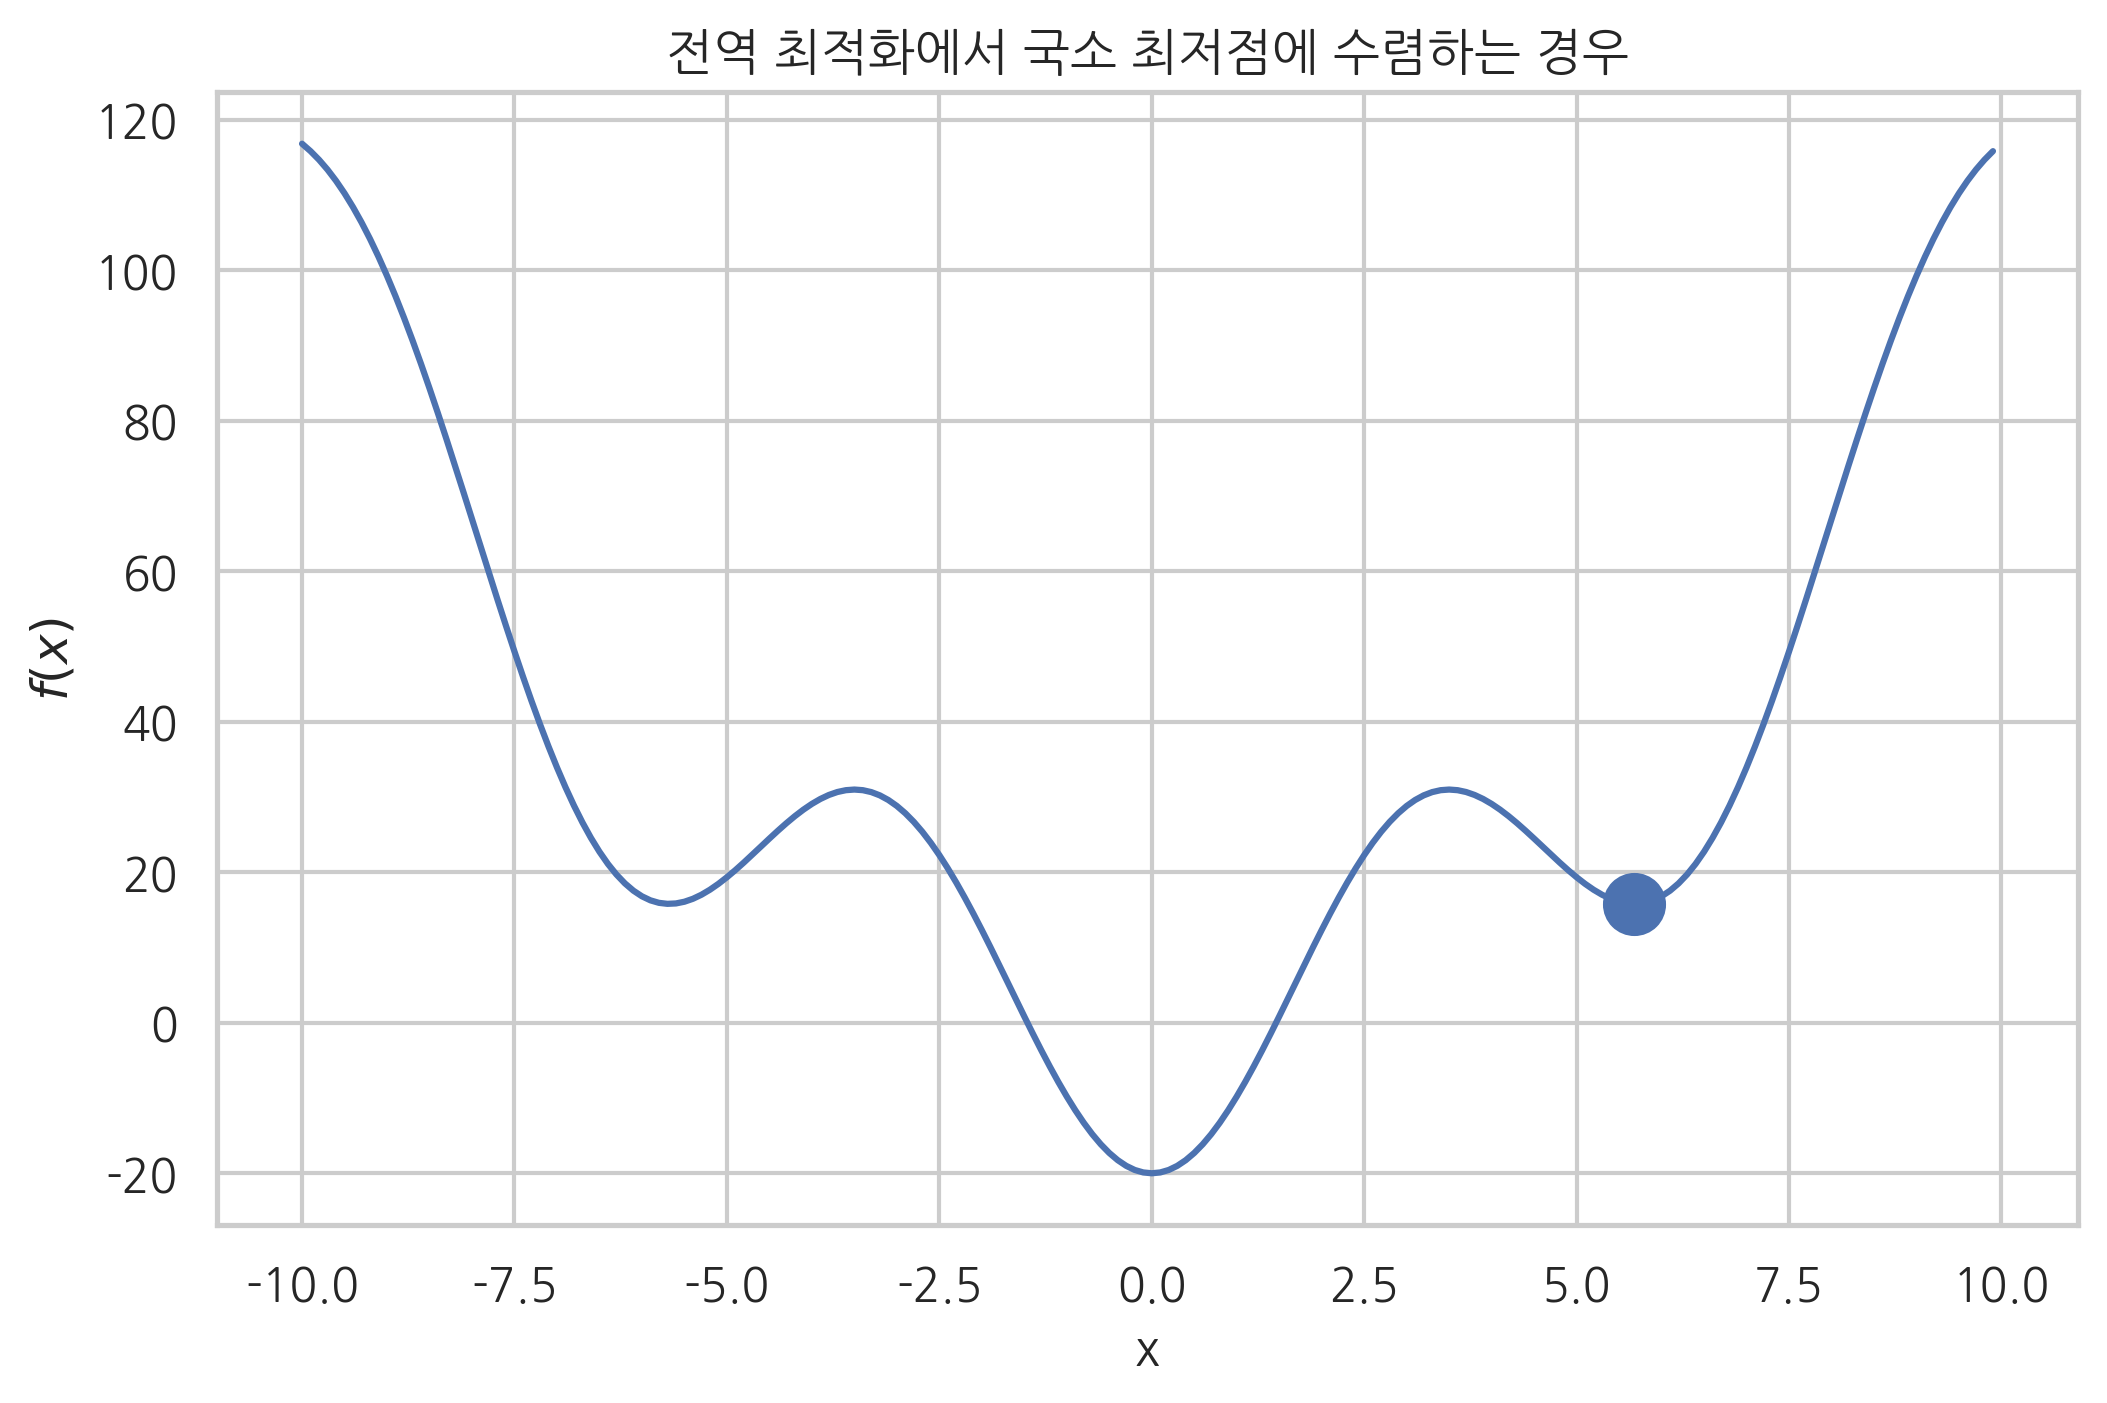

In [14]:
plt.plot(x, f_global(x));
plt.scatter(x_sol, f_global(x_sol), s=200)
plt.title("전역 최적화에서 국소 최저점에 수렴하는 경우")
plt.ylabel("$f(x)$")
plt.xlabel("x")
plt.show()

### 컨벡스 문제

목적함수의 2차 도함수의 값이 항상 0 이상이 되는 영역에서만 정의된 최적화 문제를 **컨벡스(convex) 문제**라고 한다.

$$ 
\begin{align}
\dfrac{\partial^2 f}{\partial x^2} \geq 0 
\tag{5.1.18}
\end{align}
$$

다변수 목적함수의 경우에는 주어진 영역에서 헤시안 행렬이 항상 양의 준정부호(positive semidefinite)이라는 조건이 된다.

$$ 
\begin{align}
x^THx \geq 0 \;\;\text{for all } x 
\tag{5.1.19}
\end{align}
$$

**컨벡스 문제에서는 항상 전역 최저점이 존재한다.** 

In [15]:
def f2prime(x):
    return np.array([2 * (x[0] - 1) + 400 * x[0] * (x[0]**2 - x[1]),
                     200 * x[1] * (x[1] - x[0]**2)])

result = sp.optimize.minimize(f2, (2, 0.3), jac=None)
print(result)

      fun: 2.0894341548127262e-11
 hess_inv: array([[0.49022117, 0.98027058],
       [0.98027058, 1.96519149]])
      jac: array([ 1.58933954e-06, -8.86397000e-07])
  message: 'Optimization terminated successfully.'
     nfev: 100
      nit: 18
     njev: 25
   status: 0
  success: True
        x: array([0.99999543, 0.99999085])
